# E01

## Approach
Find ix given the last two characters.

In [1]:
import torch

In [2]:
words = list(open('names.txt', 'r').read().splitlines())
words[:3]

['emma', 'olivia', 'ava']

In [3]:
l = ['.'] + sorted(set(i for w in words for i in w))
stoi = {s: i for i, s in enumerate(l)}
itos = {i: s for i, s in enumerate(l)}

In [4]:
# E02
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]


In [5]:
N = torch.zeros([27, 27, 27], dtype=torch.int32)
for w in words_test:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        N[stoi[c1], stoi[c2], stoi[c3]] += 1
N

tensor([[[   0, 3453, 1065,  ...,  119,  415,  742],
         [   0,  134,  139,  ...,   23,  134,  115],
         [   0,  122,    0,  ...,    0,    3,    0],
         ...,
         [   0,   50,    0,  ...,    1,   15,    9],
         [   0,  197,    0,  ...,    0,    0,    2],
         [   0,  351,    0,  ...,    0,   67,    0]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  29,    0,    4,  ...,    0,   13,    7],
         [  25,   16,   19,  ...,    0,    7,    0],
         ...,
         [  10,    5,    0,  ...,   19,    7,    3],
         [ 114,  287,    7,  ...,    0,   15,   33],
         [  26,   98,    0,  ...,    0,   17,   14]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  36,    4,    4,  ...,    4,   25,    7],
         [   0,   11,    0,  ...,    0,    7,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  44,    3,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [6]:
N.shape

torch.Size([27, 27, 27])

In [7]:
N += 1
P = N.float()
P /= P.sum(2, keepdim=True)
P[0]

tensor([[3.8982e-05, 1.3464e-01, 4.1555e-02, 4.7441e-02, 5.3951e-02, 4.8961e-02,
         1.1734e-02, 2.0738e-02, 2.8574e-02, 1.7074e-02, 7.4962e-02, 9.0555e-02,
         5.1885e-02, 7.8236e-02, 3.5356e-02, 1.3410e-02, 1.6840e-02, 2.8847e-03,
         5.1261e-02, 6.2176e-02, 4.2997e-02, 2.6118e-03, 1.2903e-02, 9.3556e-03,
         4.6778e-03, 1.6216e-02, 2.8963e-02],
        [2.8736e-04, 3.8793e-02, 4.0230e-02, 7.1839e-03, 8.1322e-02, 1.5805e-02,
         6.3218e-03, 2.5862e-03, 1.9828e-02, 3.6207e-02, 7.1839e-03, 1.4080e-02,
         1.5891e-01, 8.0460e-02, 1.4397e-01, 3.4483e-03, 3.4483e-03, 3.7356e-03,
         1.1207e-01, 4.5115e-02, 1.4943e-02, 3.1322e-02, 5.1724e-02, 2.0115e-03,
         6.8966e-03, 3.8793e-02, 3.3333e-02],
        [9.1575e-04, 1.1264e-01, 9.1575e-04, 9.1575e-04, 9.1575e-04, 2.1245e-01,
         9.1575e-04, 9.1575e-04, 9.1575e-03, 3.2967e-02, 1.8315e-03, 9.1575e-04,
         6.4103e-02, 9.1575e-04, 9.1575e-04, 5.6777e-02, 9.1575e-04, 9.1575e-04,
         4.6978e-

In [8]:
for i in range(10):
    ix = 0
    out = ['.', '.']
    while True:
        ix = torch.multinomial(P[stoi[out[-2]], stoi[out[-1]]], 1, replacement=True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

..aj
..laniya
..nak
..mon
..elmkjwallastin
..xace
..ri
..dannaciah
..da
..alheainali


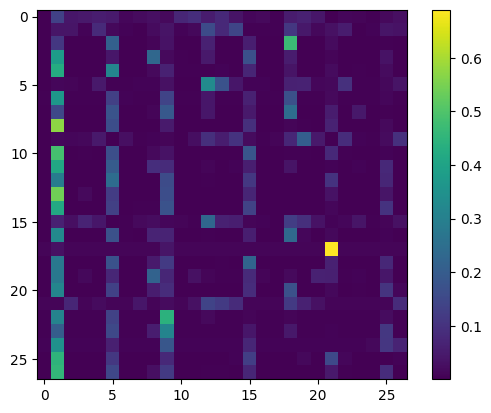

In [9]:
import matplotlib.pyplot as plt

plt.imshow(P[0])
plt.colorbar()

In [10]:
P[0][0]

tensor([3.8982e-05, 1.3464e-01, 4.1555e-02, 4.7441e-02, 5.3951e-02, 4.8961e-02,
        1.1734e-02, 2.0738e-02, 2.8574e-02, 1.7074e-02, 7.4962e-02, 9.0555e-02,
        5.1885e-02, 7.8236e-02, 3.5356e-02, 1.3410e-02, 1.6840e-02, 2.8847e-03,
        5.1261e-02, 6.2176e-02, 4.2997e-02, 2.6118e-03, 1.2903e-02, 9.3556e-03,
        4.6778e-03, 1.6216e-02, 2.8963e-02])

In [11]:
# loss
nll = 0.0
n = 0
for w in words_dev:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        prob = P[stoi[c1], stoi[c2], stoi[c3]]
        nll += -prob.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(100783.8125), 2.217221736907959


# E02

In [12]:
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]

In [13]:
words_dev

['koe',
 'blakeleigh',
 'goldie',
 'gracious',
 'arantxa',
 'griffyn',
 'carrson',
 'adalea',
 'tellis',
 'maven',
 'damon',
 'laikyn',
 'ekam',
 'miyanna',
 'sohana',
 'nikolaos',
 'yohanan',
 'jaxx',
 'jahquan',
 'yuliya',
 'ostin',
 'hamida',
 'cleo',
 'karlee',
 'roshan',
 'mckinnon',
 'syeir',
 'karalynn',
 'evyn',
 'brodan',
 'elena',
 'kaianna',
 'skylynne',
 'griffyn',
 'ilynn',
 'azaryah',
 'nyella',
 'daniel',
 'nyella',
 'jakel',
 'jiram',
 'freddy',
 'trillium',
 'umut',
 'kingston',
 'josalyn',
 'orianna',
 'maleyna',
 'elida',
 'reynolds',
 'kenlyn',
 'zac',
 'keyshia',
 'roderic',
 'ange',
 'phu',
 'dannia',
 'mabel',
 'mayley',
 'ramla',
 'catherin',
 'starlee',
 'aubrynn',
 'everly',
 'liyat',
 'rayan',
 'demari',
 'maebel',
 'aaleiya',
 'dakoda',
 'kendric',
 'sriyaan',
 'nolie',
 'kalonnie',
 'yang',
 'caliber',
 'dagen',
 'tayler',
 'jhase',
 'zayli',
 'layna',
 'tasi',
 'ellana',
 'jacklynn',
 'zaxtyn',
 'linleigh',
 'devri',
 'daly',
 'elek',
 'alexiah',
 'kalvyn'

## Bigram Model (Probabilistic)

In [22]:
Nbi = torch.zeros([27, 27])
for w in words:
    word = "." + w + "."
    for c1, c2 in zip(word, word[1:]):
        Nbi[stoi[c1], stoi[c2]] += 1
N

tensor([[[   1, 3454, 1066,  ...,  120,  416,  743],
         [   1,  135,  140,  ...,   24,  135,  116],
         [   1,  123,    1,  ...,    1,    4,    1],
         ...,
         [   1,   51,    1,  ...,    2,   16,   10],
         [   1,  198,    1,  ...,    1,    1,    3],
         [   1,  352,    1,  ...,    1,   68,    1]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  30,    1,    5,  ...,    1,   14,    8],
         [  26,   17,   20,  ...,    1,    8,    1],
         ...,
         [  11,    6,    1,  ...,   20,    8,    4],
         [ 115,  288,    8,  ...,    1,   16,   34],
         [  27,   99,    1,  ...,    1,   18,   15]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  37,    5,    5,  ...,    5,   26,    8],
         [   1,   12,    1,  ...,    1,    8,    1],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [  45,    4,    1,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]],

In [23]:
Pbi = (Nbi + 0).float()
Pbi /= Pbi.sum(1, keepdim=True)
Pbi

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [25]:
for i in range(5):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(Pbi[ix], 1, True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

tandon
ja
kan
b
lilusoniyari


In [24]:
Pbi[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [27]:
# loss
nll = 0.
n = 0
for w in words_dev:
    word = "." + w + "."
    for ch1, ch2 in zip(word, word[1:]):
        probs = Pbi[stoi[ch1], stoi[ch2]]
        nll += -probs.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(111876.6172), 2.454726457595825


## Bi-gram using single neuron
TODO